# Examples of retreiving information from Butler and Headers of all Images in an EO run

In [182]:
import numpy as np
import pandas as pd
import scipy as sp
import time
from tabulate import tabulate

import lsst.daf.butler as daf_butler
import lsst.afw.math as afw_math
from matplotlib import pyplot as plt
from astropy.stats import sigma_clip
from astropy.io import fits
from scipy.stats import skew
import logging

import lsst.afw.display as afwDisplay
from astropy.visualization import imshow_norm, MinMaxInterval,AsinhStretch,LinearStretch,SqrtStretch,ZScaleInterval,AsymmetricPercentileInterval,ManualInterval

from myutils import *

## Info 13391

In [180]:
repo = '/repo/ir2'
collections = ['LSSTCam/raw/all']
butler_raw = daf_butler.Butler(repo, collections=collections)

In [120]:
print(tabulate(dfmeta[['OBSID','MJD-DIFF','EXPTIME','TEMP6','CCDTEMP','BSSVBS','PCK_LOWP', 'PCK_HIP', 'CLKHPS_V', 'CLKHPS_I', 'CLKLPS_V', 'CLKLPS_I']],headers = 'keys', tablefmt = 'psql',floatfmt='0.3f'))

+-----+----------------------+------------+-----------+---------+-----------+----------+------------+-----------+------------+------------+------------+------------+
|     | OBSID                |   MJD-DIFF |   EXPTIME |   TEMP6 |   CCDTEMP |   BSSVBS |   PCK_LOWP |   PCK_HIP |   CLKHPS_V |   CLKHPS_I |   CLKLPS_V |   CLKLPS_I |
|-----+----------------------+------------+-----------+---------+-----------+----------+------------+-----------+------------+------------+------------+------------|
|   0 | MC_C_20230621_000268 |      0.080 |     0.000 |  -6.188 |   -98.287 |   49.975 |     -6.000 |     3.300 |     15.375 |    143.917 |     13.525 |     83.875 |
|   1 | MC_C_20230621_000269 |      0.081 |     0.000 |  -6.188 |   -98.287 |   49.975 |     -6.000 |     3.300 |     15.375 |    143.917 |     13.525 |     83.875 |
|   2 | MC_C_20230621_000270 |      0.079 |     0.000 |  -6.188 |   -98.507 |   49.975 |     -6.000 |     3.300 |     15.375 |    148.583 |     13.800 |     89.000 |
|   

In [121]:
runnum = '13391'
dsrefs = get_dsrefs(runnum,butler_raw)
df = get_run_info(runnum,butler_raw,detector=1)

In [122]:
print(tabulate(df.head(),headers = 'keys', tablefmt = 'psql',floatfmt='0.3f'))

+-----+-------------------+---------------+----------------------+-----------------+-------------+--------------------+----------------------+-----------+-----------+-------------+-----------+------------+
|     | physical_filter   |            id | obs_id               |   exposure_time |   dark_time | observation_type   | observation_reason   |   day_obs |   seq_num |   mjd_begin |   mjd_end |   detector |
|-----+-------------------+---------------+----------------------+-----------------+-------------+--------------------+----------------------+-----------+-----------+-------------+-----------+------------|
| 102 | unknown           | 3023062100268 | MC_C_20230621_000268 |           0.000 |       0.080 | bias               | bias                 |  20230621 |       268 |   60117.004 | 60117.004 |          1 |
| 214 | unknown           | 3023062100269 | MC_C_20230621_000269 |           0.000 |       0.081 | bias               | bias                 |  20230621 |       269 |   60117.0

In [123]:
df['mjd_delta_sec'] =  24.*3600.*(df.mjd_end-df.mjd_begin)

In [149]:
# now from the header...
# detector =112  #R24_S11
detector =92 # R22_S02
dsrefs = get_dsrefs(runnum,butler_raw,detector=detector)

In [193]:
from lsst.obs.lsst import LsstCam
camera = LsstCam.getCamera()
det_names = {i: det.getName() for i, det in enumerate(camera)}
det_nums = {det.getName():i for i, det in enumerate(camera)}

print(det_names[34],det_nums['R22_S02'])

R10_S21 92


In [154]:
keys = ['OBSID','DAYOBS','SEQNUM','MJD-OBS','MJD-TRG','MJD-BEG','MJD-END','EXPTIME','DARKTIME','IMGTYPE','TESTTYPE','FILTER','FILTER1','FILTER2','TEMP6','TEMP10','CCDTEMP','BSSVBS']
# add voltage keys
keys+= ['PCK_LOWP', 'PCK_HIP', 'CLKHPS_V', 'CLKHPS_I', 'CLKLPS_V', 'CLKLPS_I']

dfmeta = get_metadata(butler_raw,dsrefs,keys)
dfmeta['MJD-DIFF'] = 24.*3600.*(dfmeta['MJD-END']-dfmeta['MJD-BEG'])


Number of images:  218
Total time:  42.015268325805664


In [155]:
print(tabulate(dfmeta[['OBSID','MJD-DIFF','EXPTIME','TEMP6','CCDTEMP','BSSVBS','PCK_LOWP', 'PCK_HIP', 'CLKHPS_V', 'CLKHPS_I', 'CLKLPS_V', 'CLKLPS_I']].head(),headers = 'keys', tablefmt = 'psql',floatfmt='0.3f'))

+----+----------------------+------------+-----------+---------+-----------+----------+------------+-----------+------------+------------+------------+------------+
|    | OBSID                |   MJD-DIFF |   EXPTIME |   TEMP6 |   CCDTEMP |   BSSVBS |   PCK_LOWP |   PCK_HIP |   CLKHPS_V |   CLKHPS_I |   CLKLPS_V |   CLKLPS_I |
|----+----------------------+------------+-----------+---------+-----------+----------+------------+-----------+------------+------------+------------+------------|
|  0 | MC_C_20230621_000268 |      0.080 |     0.000 |  -7.500 |  -100.157 |   50.025 |     -6.000 |     3.300 |     15.375 |    144.333 |     13.600 |     84.250 |
|  1 | MC_C_20230621_000269 |      0.081 |     0.000 |  -7.500 |  -100.623 |   50.025 |     -6.000 |     3.300 |     15.375 |    149.000 |     13.600 |     84.250 |
|  2 | MC_C_20230621_000270 |      0.079 |     0.000 |  -7.500 |  -100.623 |   50.025 |     -6.000 |     3.300 |     15.375 |    149.000 |     13.600 |     84.250 |
|  3 | MC_

Text(0, 0.5, 'Mean Volatage Diff [V]')

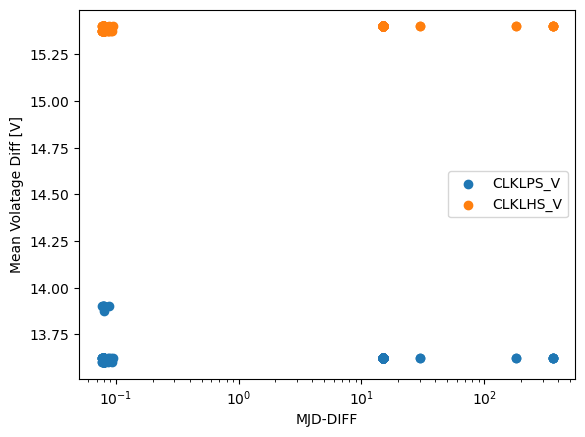

In [156]:
# plt.scatter(dfmeta['MJD-DIFF'],dfmeta['PCK_LOWP']-dfmeta['PCK_LOWP'].mean())
# plt.scatter(dfmeta['MJD-DIFF'],dfmeta['PCK_HIP']-dfmeta['PCK_HIP'].mean())
plt.scatter(dfmeta['MJD-DIFF'],dfmeta['CLKLPS_V'],label='CLKLPS_V')
plt.scatter(dfmeta['MJD-DIFF'],dfmeta['CLKHPS_V'],label='CLKLHS_V')
plt.legend()
plt.xscale('log')
plt.xlabel(r'MJD-DIFF') 
plt.ylabel(r'Mean Volatage Diff [V]')

Text(0, 0.5, 'Mean Currante Diff [A]')

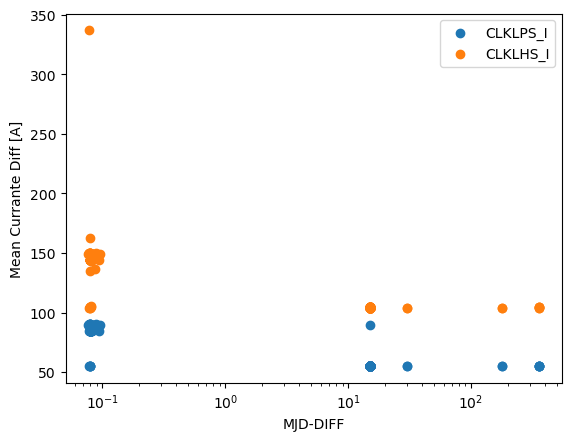

In [157]:
# plt.scatter(dfmeta['MJD-DIFF'],dfmeta['PCK_LOWP']-dfmeta['PCK_LOWP'].mean())
# plt.scatter(dfmeta['MJD-DIFF'],dfmeta['PCK_HIP']-dfmeta['PCK_HIP'].mean())
plt.scatter(dfmeta['MJD-DIFF'],dfmeta['CLKLPS_I'],label='CLKLPS_I')
plt.scatter(dfmeta['MJD-DIFF'],dfmeta['CLKHPS_I'],label='CLKLHS_I')
plt.legend()
plt.xscale('log')
plt.xlabel(r'MJD-DIFF') 
plt.ylabel(r'Mean Currante Diff [A]')

Text(0.5, 1.0, 'Run 13391 Flat Images')

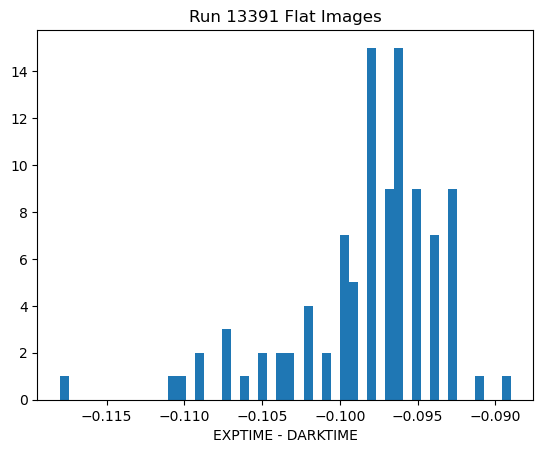

In [158]:
# DarkTime - ExpTime
f,ax = plt.subplots(1,1)
flats = (dfmeta['IMGTYPE'] == 'FLAT')
h = ax.hist(dfmeta[flats]['EXPTIME']-dfmeta[flats]['DARKTIME'],bins=50)
ax.set_xlabel('EXPTIME - DARKTIME')
ax.set_title('Run %s Flat Images'%(runnum))

In [159]:
apath = butler_raw.datastore.getURI(dsrefs[30])
print(apath.path)


/LSSTCam/20230621/MC_C_20230621_000477/MC_C_20230621_000477_R22_S02.fits


## Info 13162


In [66]:
repo = '/repo/ir2'
collections = ['LSSTCam/raw/all']
butler_main = daf_butler.Butler(repo, collections=collections)

In [80]:
# repo = '/repo/main'
# collections = ['LSSTCam/raw/all']
# butler_main = daf_butler.Butler(repo, collections=collections)
# run = '13162'
# where = "exposure.science_program=myrun"    
# dsrefs = list(set(butler_main.registry.queryDatasets('raw', where=where,  bind={"myrun": run}, detector=detector).expanded()))
# print(f'There are {len(dsrefs)} dasates in here')

In [84]:
rawmeta = butler_main.get(dsrefs[0].makeComponentRef("metadata"))
print(rawmeta)

SIMPLE = 1
// Java FITS: Fri Dec 10 20:22:19 PST 2021
EXTEND = 1
// Extensions are permitted
DATE = "2021-12-13T00:54:17.736"
// Creation Date and Time of File
MJD = 59561.037705278
// Modified Julian Date that the file was written
RUNNUM = "13162"
// The Run Number
CCD_MANU = "E2V"
// CCD Manufacturer
CCD_TYPE = "CCD250"
// CCD Model Number
TESTTYPE = "DARK"
// BIAS, DARK, FE55, FLAT, LAMBDA, PERSISTENCE, SPOT, SFLAT_<lam
IMGTYPE = "BIAS"
// BIAS, DARK, FE55, FLAT, FLAT_<lam>, SPOT, PPUMP
DETSIZE = "[1:4096,1:4004]"
EXPTIME = 0.0000000000000
// Exposure Time in Seconds
BINX = 1
// [pixels] binning along X axis
BINY = 1
// [pixels] binning along Y axis
CCDGAIN = 1.0000000000000
// Rough guess at overall system gain (e-/DNB)
CCDNOISE = 10.000000000000
// Rough guess at system noise (e- rms)
DATE-OBS = "2021-12-13T00:54:17.728"
// Date of the image trigger (readout), UTC f
MJD-OBS = 59561.037705185
// Modified Julian Date of image trigger
DATE-TRG = "2021-12-13T00:54:17.728"
// Date of t

In [79]:
# now from the header...
runnum = '13162'
detector =112  #R24_S11
dsrefs = get_dsrefs(runnum,butler_raw,detector=detector)

In [90]:
keys = ['OBSID','DAYOBS','SEQNUM','MJD-OBS','MJD-TRG','EXPTIME','DARKTIME','IMGTYPE','TESTTYPE','TEMP6','TEMP10','CCDTEMP','BSSVBS']
# add voltage keys
keys+= ['PCK_LOWP', 'PCK_HIP', 'CLKHPS_V', 'CLKHPS_I', 'CLKLPS_V', 'CLKLPS_I']

dfmetaRun5 = get_metadata(butler_main,dsrefs,keys)
# dfmeta['MJD-DIFF'] = 24.*3600.*(dfmeta['MJD-END']-dfmeta['MJD-BEG'])


In [133]:
print(tabulate(dfmeta[['OBSID','EXPTIME','TEMP6','CCDTEMP','BSSVBS','PCK_LOWP', 'PCK_HIP', 'CLKHPS_V', 'CLKHPS_I', 'CLKLPS_V', 'CLKLPS_I']].head(),headers = 'keys', tablefmt = 'psql',floatfmt='0.3f'))

+----+----------------------+-----------+---------+-----------+----------+------------+-----------+------------+------------+------------+------------+
|    | OBSID                |   EXPTIME |   TEMP6 |   CCDTEMP |   BSSVBS |   PCK_LOWP |   PCK_HIP |   CLKHPS_V |   CLKHPS_I |   CLKLPS_V |   CLKLPS_I |
|----+----------------------+-----------+---------+-----------+----------+------------+-----------+------------+------------+------------+------------|
|  0 | MC_C_20230621_000268 |     0.000 |  -6.188 |   -98.287 |   49.975 |     -6.000 |     3.300 |     15.375 |    143.917 |     13.525 |     83.875 |
|  1 | MC_C_20230621_000269 |     0.000 |  -6.188 |   -98.287 |   49.975 |     -6.000 |     3.300 |     15.375 |    143.917 |     13.525 |     83.875 |
|  2 | MC_C_20230621_000270 |     0.000 |  -6.188 |   -98.507 |   49.975 |     -6.000 |     3.300 |     15.375 |    148.583 |     13.800 |     89.000 |
|  3 | MC_C_20230621_000271 |     0.000 |  -6.250 |   -98.507 |   49.975 |     -6.000 | 

In [186]:
# loop over some detectors (2 ITL, 2 E2V)
def compare_quantities(runnum,bulter,quantities,detector=92):
    print('Run, detector: %s, %i'%(runnum, detector))
    # load metadata
    dsrefs = get_dsrefs(runnum,bulter,detector=detector)
    keys = ['OBSID','CCD_MANU','DATE-OBS']
    keys += quantities
    if len(dsrefs)>0:
        dfmeta = get_metadata(bulter,dsrefs,keys)
        # grab stats
        out = dict()
        out['OBSID'] = dfmeta['OBSID'].iloc[0]
        out['CCD_MANU'] = dfmeta['CCD_MANU'].iloc[0]
        out['DATE-OBS'] = dfmeta['DATE-OBS'].iloc[0]
        for col in quantities:
            out[col+'_MEAN'] = np.nanmean(dfmeta[col])
            out[col+'_STD'] = np.nanstd(dfmeta[col])
        out['DET'] = detector
        out['NOBJS'] = len(dfmeta)
    else:
        outkeys = keys+['NOBJS','DET']
        outkeys+= [col+'_MEAN' for col in quantities]
        outkeys+= [col+'_STD' for col in quantities]
        out = dict().fromkeys(keys)
    print('\n')
    return out
    

In [201]:
quantities = ['TEMP6','CCDTEMP','BSSVBS','PCK_LOWP', 'PCK_HIP', 'CLKHPS_V', 'CLKHPS_I', 'CLKLPS_V', 'CLKLPS_I']
detectors = [13,34,92,112]
tables1, tables2 = [], []
for det in detectors:
    tables1.append(compare_quantities('13391',butler_raw,quantities,detector=det))
    tables2.append(compare_quantities('13162',butler_raw,quantities,detector=det))
df1 = pd.DataFrame(tables1,index=np.arange(len(detectors)))
df2 = pd.DataFrame(tables2,index=np.arange(len(detectors)))

In [221]:
# df2 = df[1::2]
# df1 = df[::2]

l2 = 'Run5: 13162'
l1 = 'Run6: 13391'

In [240]:
from datetime import date

# Get the current date
today = date.today()

# Print the current date
print(today)

2023-06-24


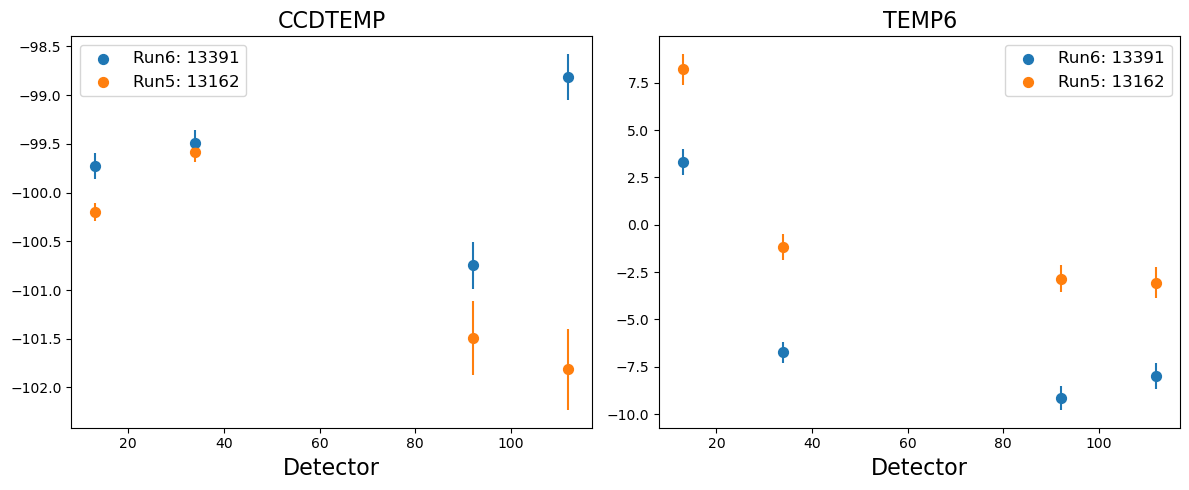

In [243]:
fig, axs = plt.subplots(1,2,figsize=(12,5))

for i,ycol in enumerate(['CCDTEMP','TEMP6']):
    axs[i].scatter(df1['DET'],df1[ycol+'_MEAN'],s=50,label=l1)
    axs[i].errorbar(df1['DET'],df1[ycol+'_MEAN'],yerr=df1[ycol+'_STD'],fmt='o')

    axs[i].scatter(df2['DET'],df2[ycol+'_MEAN'],s=50,label=l2)
    axs[i].errorbar(df2['DET'],df2[ycol+'_MEAN'],yerr=df2[ycol+'_STD'],fmt='o')

    axs[i].legend(fontsize=12)
    axs[i].set_title(ycol,fontsize=16)
    axs[i].set_xlabel('Detector',fontsize=16)
    
fig.tight_layout()
fig.savefig(f'CCDREBTempCom_Run5_Run6_comp_{today}.png',dpi=100)

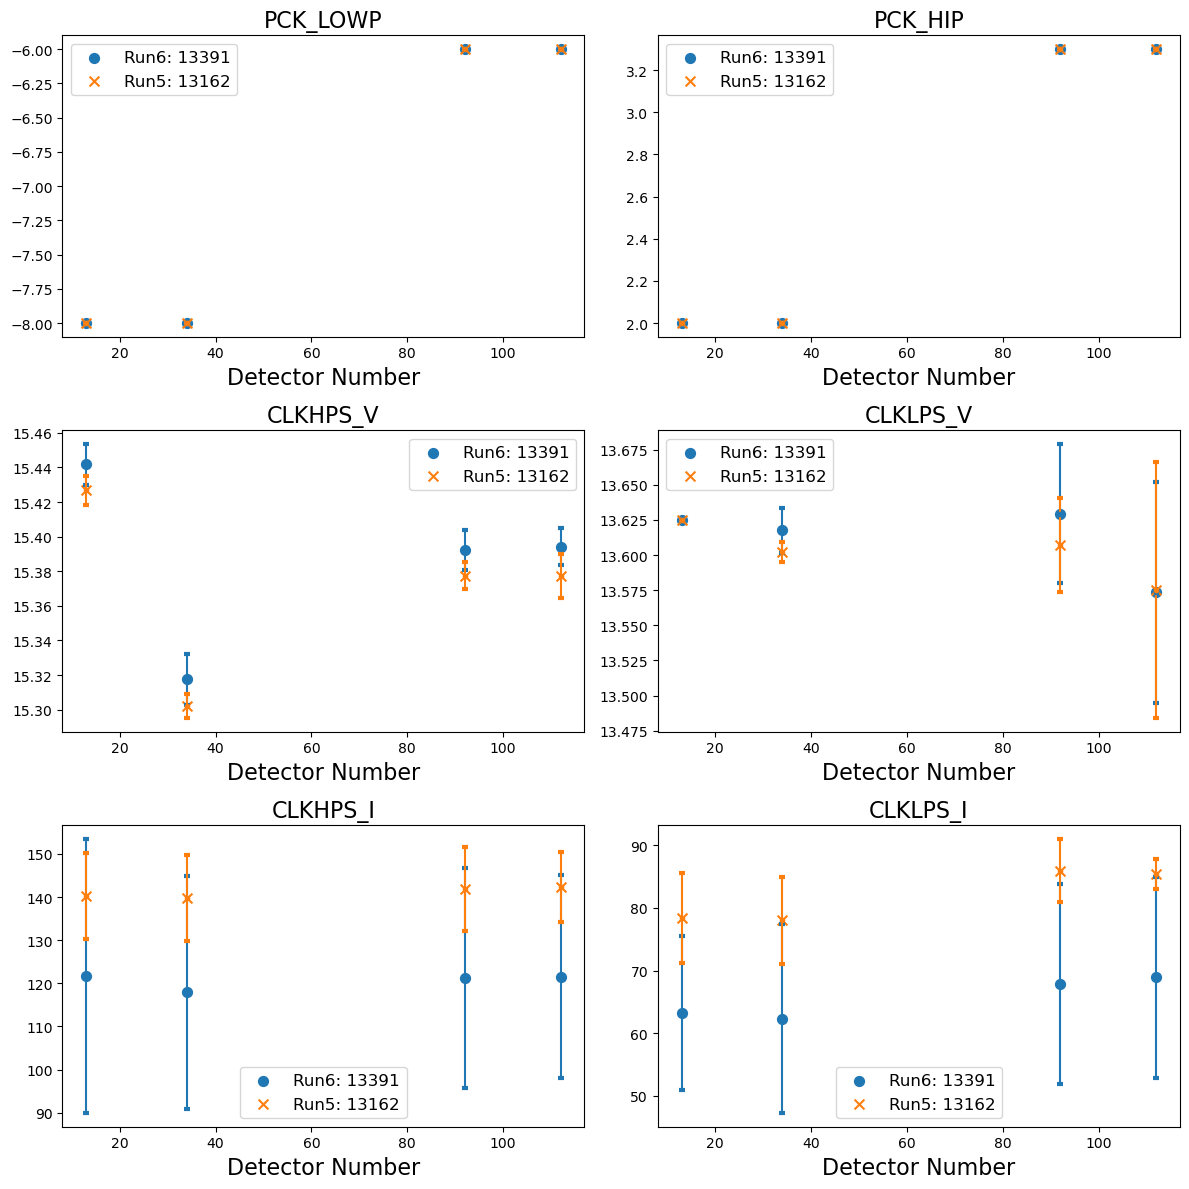

In [245]:
fig, axs = plt.subplots(3,2,figsize=(12,12))

i,j = 0, 0
for ycol in ['PCK_LOWP', 'PCK_HIP', 'CLKHPS_V', 'CLKLPS_V', 'CLKHPS_I', 'CLKLPS_I']:
    axs[i,j].scatter(df1['DET'],df1[ycol+'_MEAN'],s=50,label=l1)
    axs[i,j].errorbar(df1['DET'],df1[ycol+'_MEAN'],yerr=df1[ycol+'_STD'],fmt='.',capthick=3,capsize=2)

    axs[i,j].scatter(df2['DET'],df2[ycol+'_MEAN'],s=50,label=l2,marker='x')
    axs[i,j].errorbar(df2['DET'],df2[ycol+'_MEAN'],yerr=df2[ycol+'_STD'],fmt='.',capthick=3,capsize=2)

    axs[i,j].legend(fontsize=12)
    axs[i,j].set_title(ycol,fontsize=16)
    axs[i,j].set_xlabel('Detector Number',fontsize=16)
    j+=1
    if j>1:
        i += 1
        j = 0
        
fig.tight_layout()
fig.savefig(f'VoltComp_Run5_Run6_{today}.png',dpi=100)